<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Tải các thư viện cần thiết</strong></p>
</div>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
 
warnings.filterwarnings('ignore')

In [5]:
# Tải dữ liệu từ file CSV (Ví dụ, bạn cần tải dataset Kaggle)
df1 = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv') 
df2 = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')  
df = pd.concat([df1, df2], ignore_index=True)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>1. Thông tin tổng quan của Dataset:</strong></p>
</div>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>2. Loại bỏ cột có tỉ lệ missing values cao:</strong></p>
</div>


In [7]:
# Phân tích dữ liệu bị thiếu
missing_data =df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})

print(missing_df)


              Missing Count  Missing %
PoolQC                 2909  99.657417
MiscFeature            2814  96.402878
Alley                  2721  93.216855
Fence                  2348  80.438506
MasVnrType             1766  60.500171
SalePrice              1459  49.982871
FireplaceQu            1420  48.646797
LotFrontage             486  16.649538
GarageCond              159   5.447071
GarageYrBlt             159   5.447071
GarageFinish            159   5.447071
GarageQual              159   5.447071
GarageType              157   5.378554
BsmtExposure             82   2.809181
BsmtCond                 82   2.809181
BsmtQual                 81   2.774923
BsmtFinType2             80   2.740665
BsmtFinType1             79   2.706406
MasVnrArea               23   0.787941
MSZoning                  4   0.137033
Functional                2   0.068517
BsmtHalfBath              2   0.068517
BsmtFullBath              2   0.068517
Utilities                 2   0.068517
KitchenQual              

In [8]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(columns=cols_to_drop, inplace=True)

In [9]:
missing_df = df.copy()
# Lọc chỉ giữ các cột có ít nhất 1 giá trị missing
missing_cols = missing_df.columns[missing_df.isnull().any()]
# Giữ lại chỉ các cột bị missing
missing_df = missing_df[missing_cols]

In [10]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [171]:
df.to_csv('Stage1.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>3. Xử lý cột bị mising values</strong></p>
</div>


In [11]:
# Tách các cột dạng số và dạng phân loại
numeric_cols = missing_df.select_dtypes(include=['number'])
categorical_cols = missing_df.select_dtypes(include=['object', 'category'])

# Lưu vào DataFrame mới
missnum_df = numeric_cols.copy()  # Sao chép cột dạng số
misscat_df = categorical_cols.copy()  # Sao chép cột dạng phân loại
print(missnum_df.shape)
print(misscat_df.shape)

(2919, 12)
(2919, 19)


In [12]:
# Cột số - điền bằng median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())

In [13]:
# Cột kiểu chuỗi (categorical) - điền bằng 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('Ex')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('Fin')
df['GarageQual'] = df['GarageQual'].fillna('Ex')
df['GarageCond'] = df['GarageCond'].fillna('Ex')
df['BsmtExposure'] = df['BsmtExposure'].fillna('Gd')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('GLQ')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('GLQ')
df['BsmtQual'] = df['BsmtQual'].fillna('Ex')
df['BsmtCond'] = df['BsmtCond'].fillna('Ex')
df['MSZoning'] = df['MSZoning'].fillna('None')
df['Utilities'] = df['Utilities'].fillna('AllPub')
df['Functional'] = df['Functional'].fillna('GLQ')

# Điền cột mode vì chỉ thiếu 1
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])


In [14]:
#Kiểm tra missing values trong bảng
print("Số lượng missing value còn lại:")
print(df.isnull().sum().sort_values(ascending=False).head(60))


Số lượng missing value còn lại:
SalePrice        1459
HalfBath            0
FireplaceQu         0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
FullBath            0
HeatingQC           0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
Electrical          0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageArea          0
CentralAir          0
Id                  0
MSSubClass          0
LandSlope           0
OverallCond         0
OverallQual         0
HouseStyle          0


In [15]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [177]:
df.to_csv('Stage2.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>4. Xử lý cột bị lệch nặng</strong></p>
</div>


In [16]:
# Số lượng cột dạng số có trong bảng
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  
number_df = df[numeric_cols]
len(numeric_cols)

38

In [17]:
# In số giá trị duy nhất cho từng cột
unique_counts = {col: number_df[col].nunique() for col in numeric_cols}
unique_counts

{'Id': 2919,
 'MSSubClass': 16,
 'LotFrontage': 128,
 'LotArea': 1951,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 118,
 'YearRemodAdd': 61,
 'MasVnrArea': 444,
 'BsmtFinSF1': 992,
 'BsmtFinSF2': 272,
 'BsmtUnfSF': 1135,
 'TotalBsmtSF': 1059,
 '1stFlrSF': 1083,
 '2ndFlrSF': 635,
 'LowQualFinSF': 36,
 'GrLivArea': 1292,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 5,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'TotRmsAbvGrd': 14,
 'Fireplaces': 5,
 'GarageYrBlt': 103,
 'GarageCars': 6,
 'GarageArea': 603,
 'WoodDeckSF': 379,
 'OpenPorchSF': 252,
 'EnclosedPorch': 183,
 '3SsnPorch': 31,
 'ScreenPorch': 121,
 'PoolArea': 14,
 'MiscVal': 38,
 'MoSold': 12,
 'YrSold': 5,
 'SalePrice': 663}

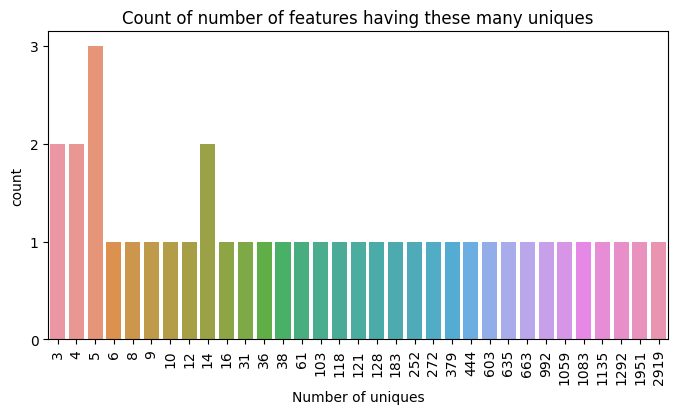

In [18]:
plt.figure(figsize=(8, 4))
plt.xlabel('Number of uniques')
plt.xticks(rotation=90)
plt.yticks(range(0, 5))  # Điều chỉnh nếu cần
plt.title('Count of number of features having these many uniques')

# Chuyển list thành pd.Series để tránh cảnh báo
sns.countplot(x=pd.Series(list(unique_counts.values())))
plt.show()


In [19]:
# Lựa ra các cột có số lượng giá trị duy nhất bé hơn 15
columns_with_few_uniques = [col for col, count in unique_counts.items() if count <= 15]
# Lựa ra các cột có số lượng giá trị duy nhất lớn hơn 15
columns_with_many_uniques = [col for col, count in unique_counts.items() if count > 15]

# Đếm và hiển thị số lượng cột có nhiều giá trị duy nhất
print("Số lượng cột có nhiều giá trị duy nhất:", len(columns_with_many_uniques))

# Đếm và hiển thị số lượng cột có ít giá trị duy nhất
print("Số lượng cột có ít giá trị duy nhất:", len(columns_with_few_uniques))

Số lượng cột có nhiều giá trị duy nhất: 24
Số lượng cột có ít giá trị duy nhất: 14


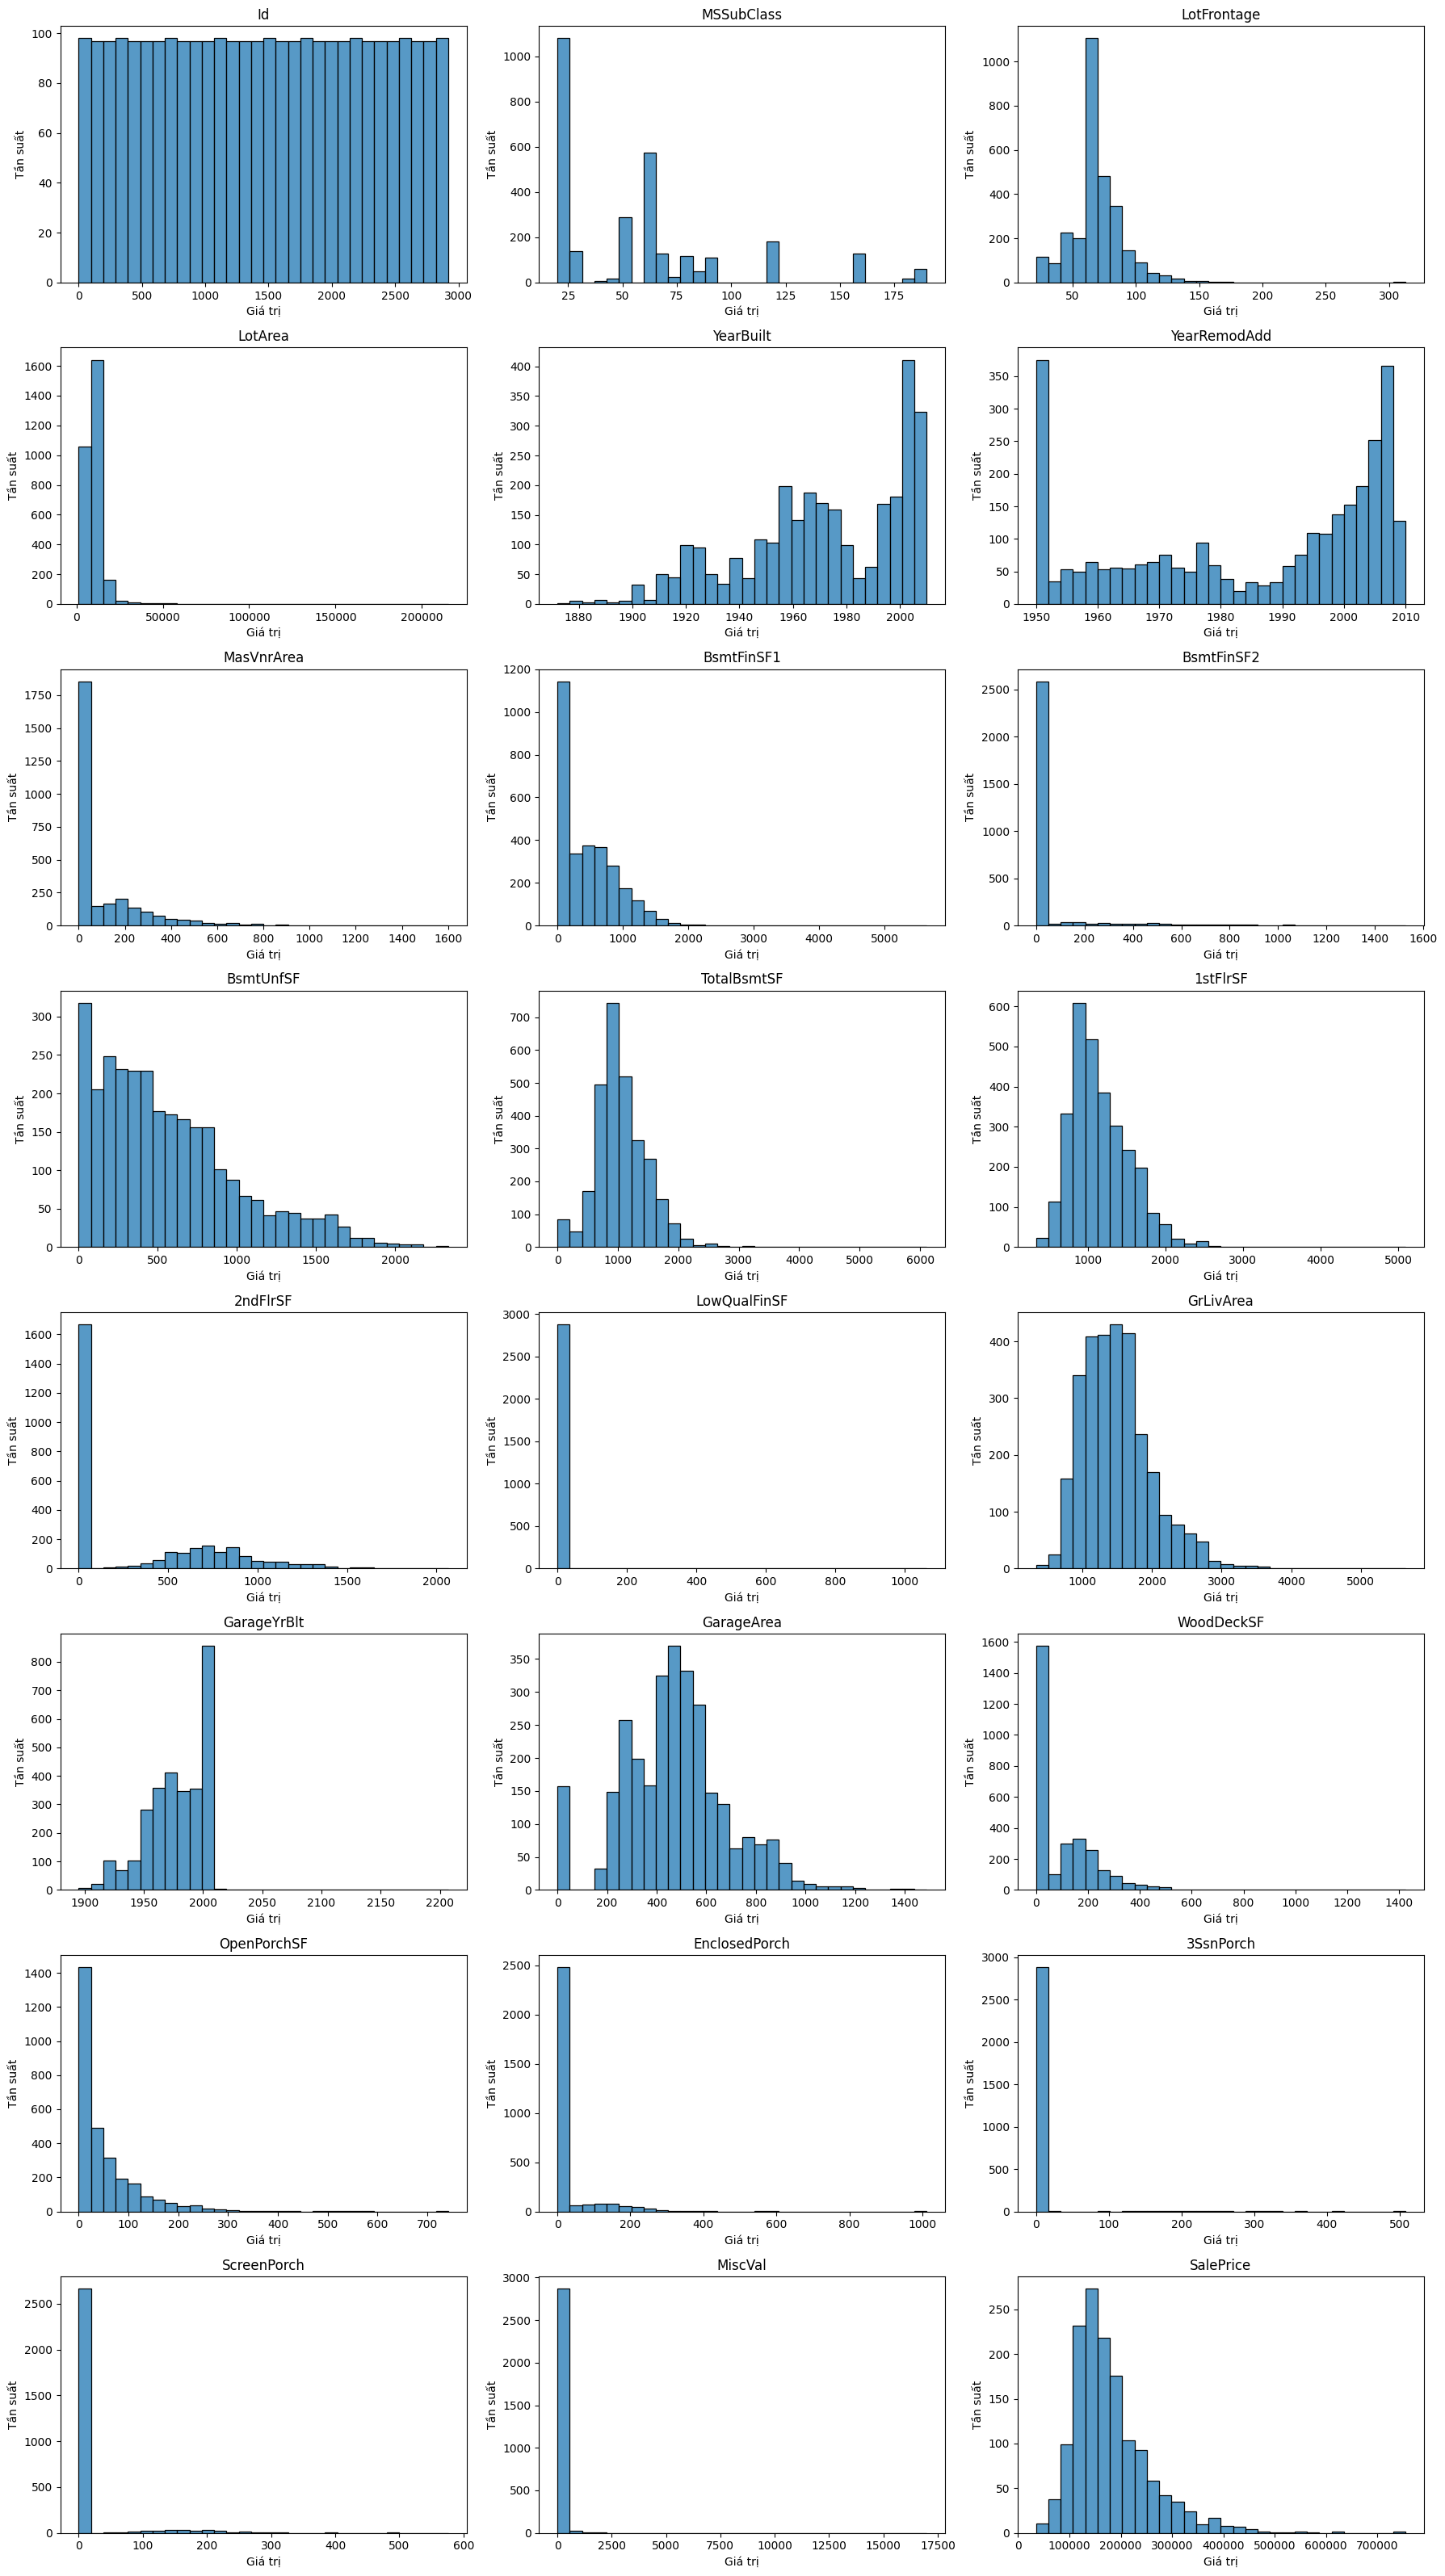

In [20]:
cols_per_row = 3  # Số cột trong mỗi hàng
rows = (len(columns_with_many_uniques) // cols_per_row) + (len(columns_with_many_uniques) % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
# Lưu hình ảnh vào file
plt.savefig('distribution_plots.png')  # Đặt tên và định dạng file
plt.show()

In [21]:
skewed_num_features = ['ScreenPorch', 'LowQualFinSF', '3SsnPorch',
                       'BsmtFinSF2', 'MiscVal', 'EnclosedPorch']
# Lấy các cột nhiều giá trị duy nhất trừ đi các cột có độ lệch
columns_with_many_uniques = [col for col in columns_with_many_uniques if col not in skewed_num_features]
df = df.drop(columns=[col for col in skewed_num_features if col in df.columns])

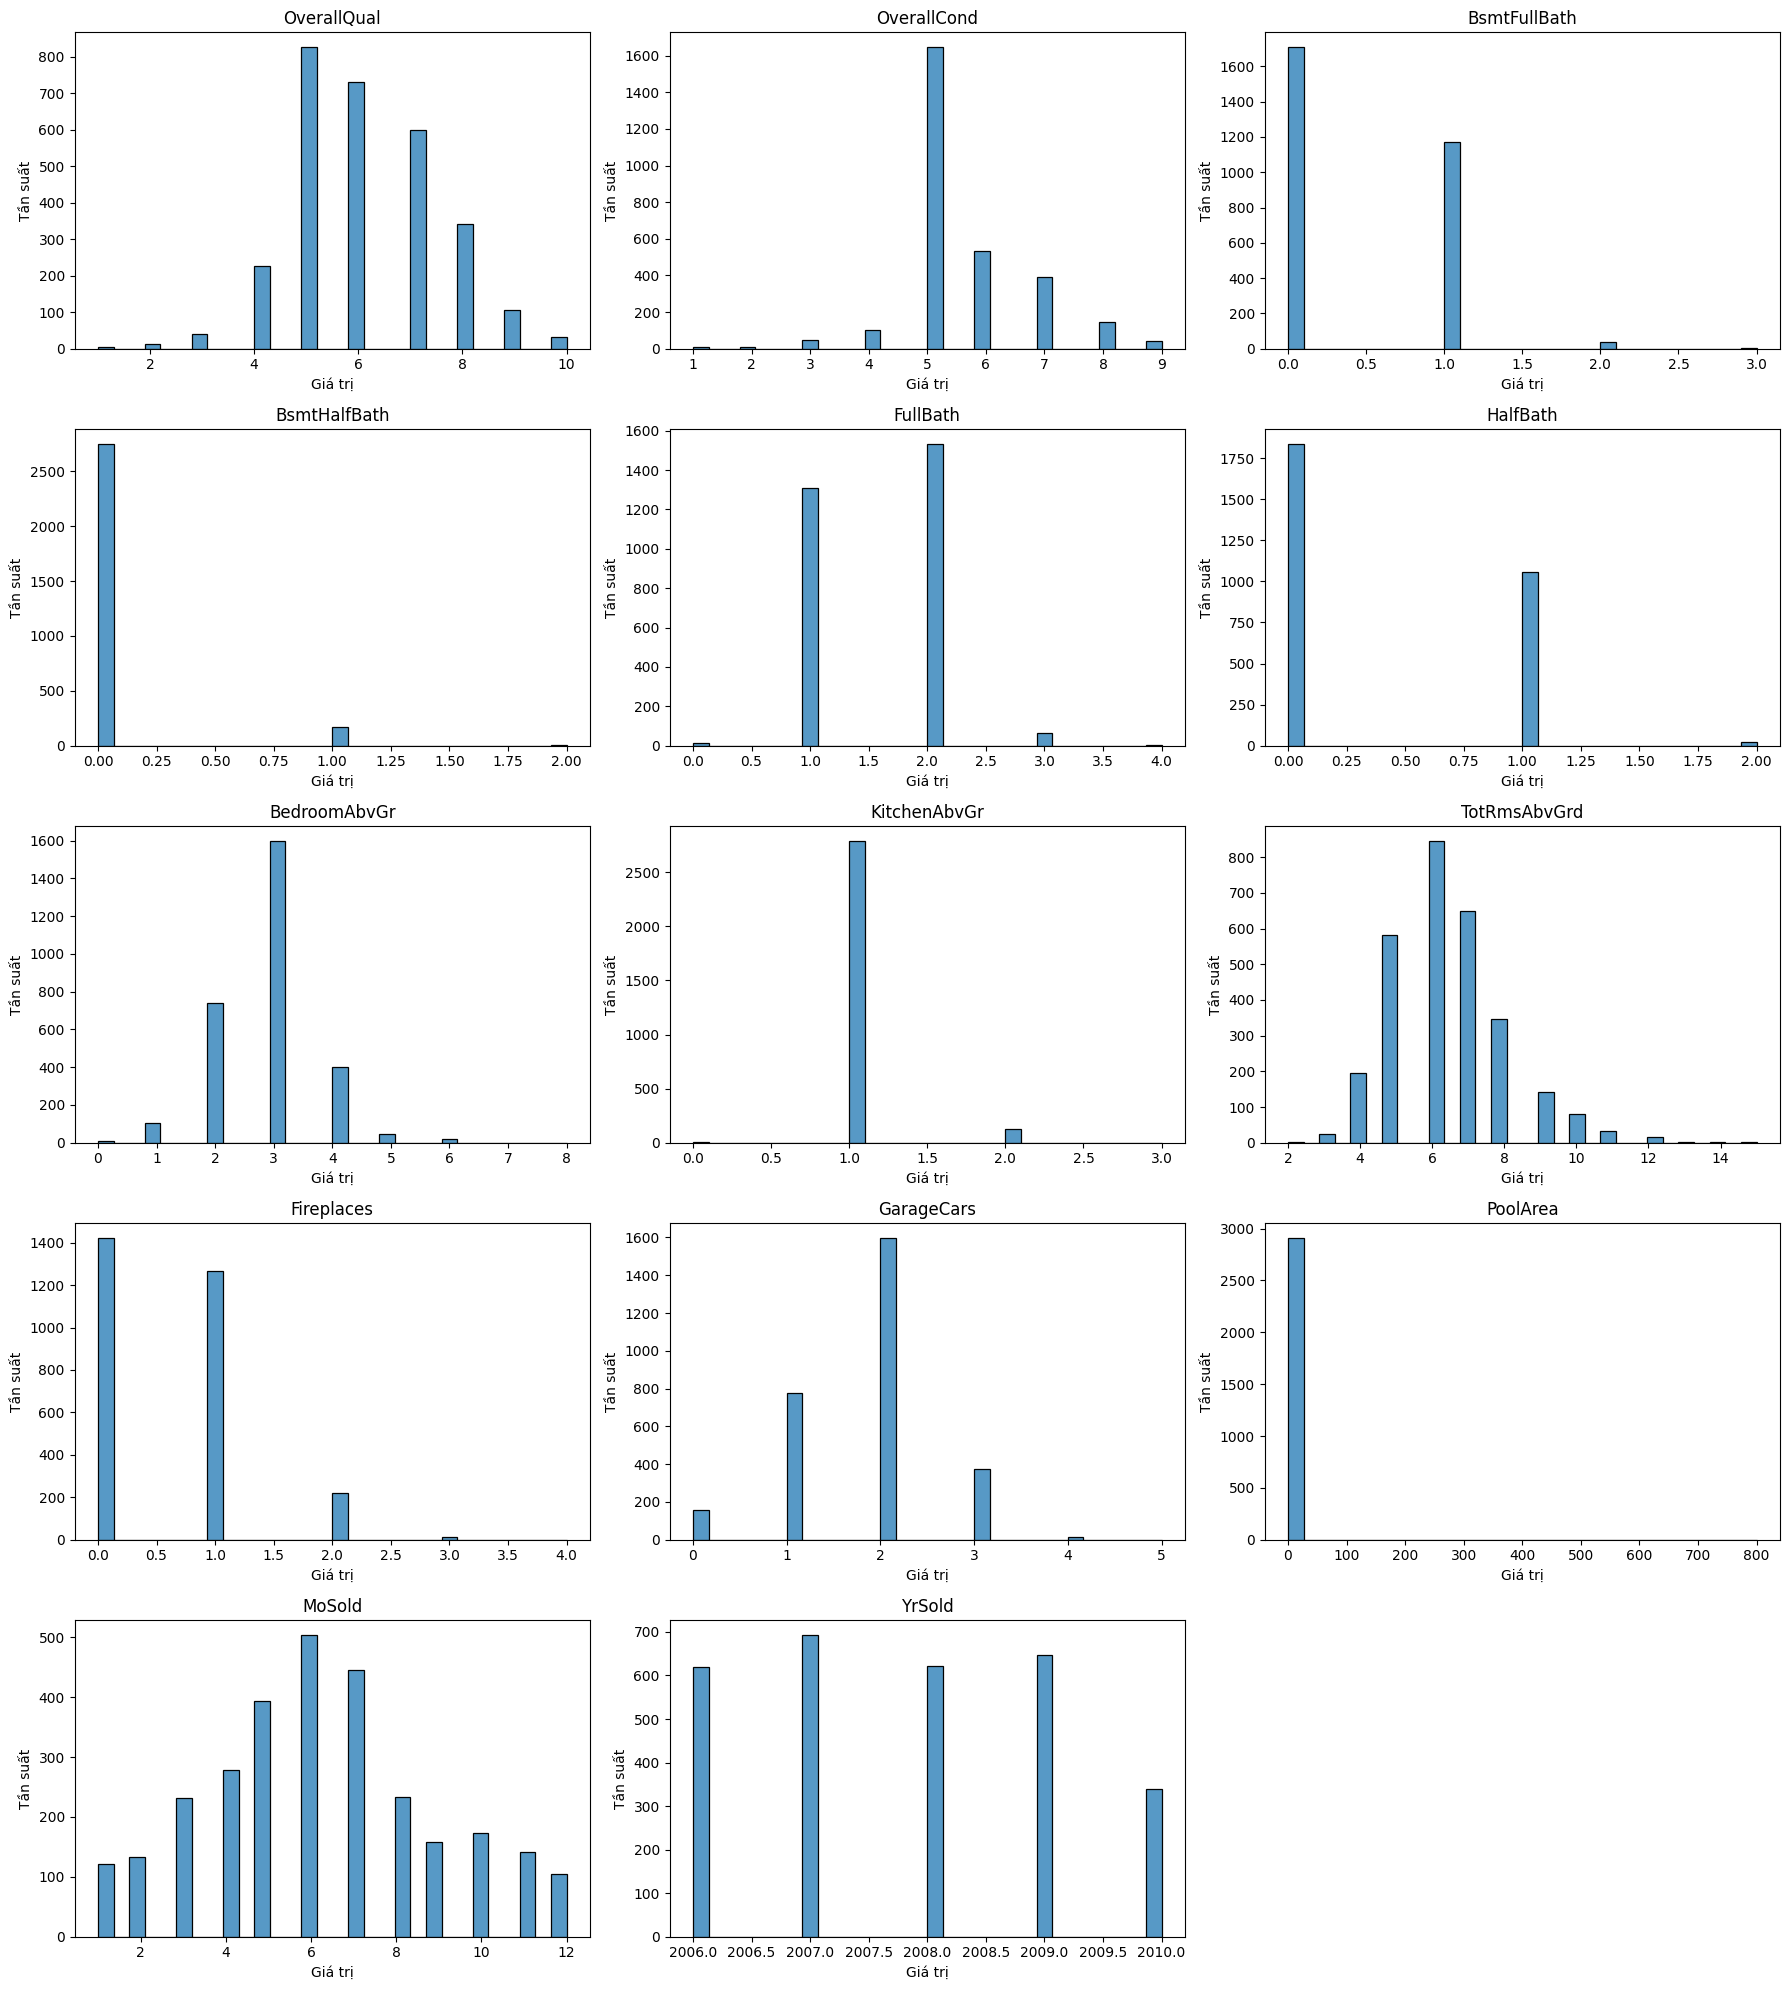

In [22]:
cols_per_row = 3  # Số cột trong mỗi hàng
rows = (len(columns_with_few_uniques) // cols_per_row) + (len(columns_with_few_uniques) % cols_per_row > 0)

plt.figure(figsize=(18, 4 * rows))  # Điều chỉnh chiều cao theo số hàng
for i, col in enumerate(columns_with_few_uniques):
    plt.subplot(rows, cols_per_row, i + 1)  # Sắp xếp các biểu đồ thành lưới
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(col)
    plt.xlabel('Giá trị')
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.savefig('distribution_plots1.png')  # Đặt tên và định dạng file
plt.show()

In [23]:
skewed_num_features = ['PoolArea']
# Lấy các cột nhiều giá trị duy nhất trừ đi các cột có độ lệch
columns_with_few_uniques = [col for col in columns_with_few_uniques if col not in skewed_num_features]
df = df.drop(columns=[col for col in skewed_num_features if col in df.columns])

In [24]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,Ex,Ex,Y,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,24,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,474,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,Ex,Ex,Y,80,32,7,2006,WD,Normal,NaN


In [187]:
df.to_csv('Stage3.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>5. Xử lý outliers </strong></p>
</div>


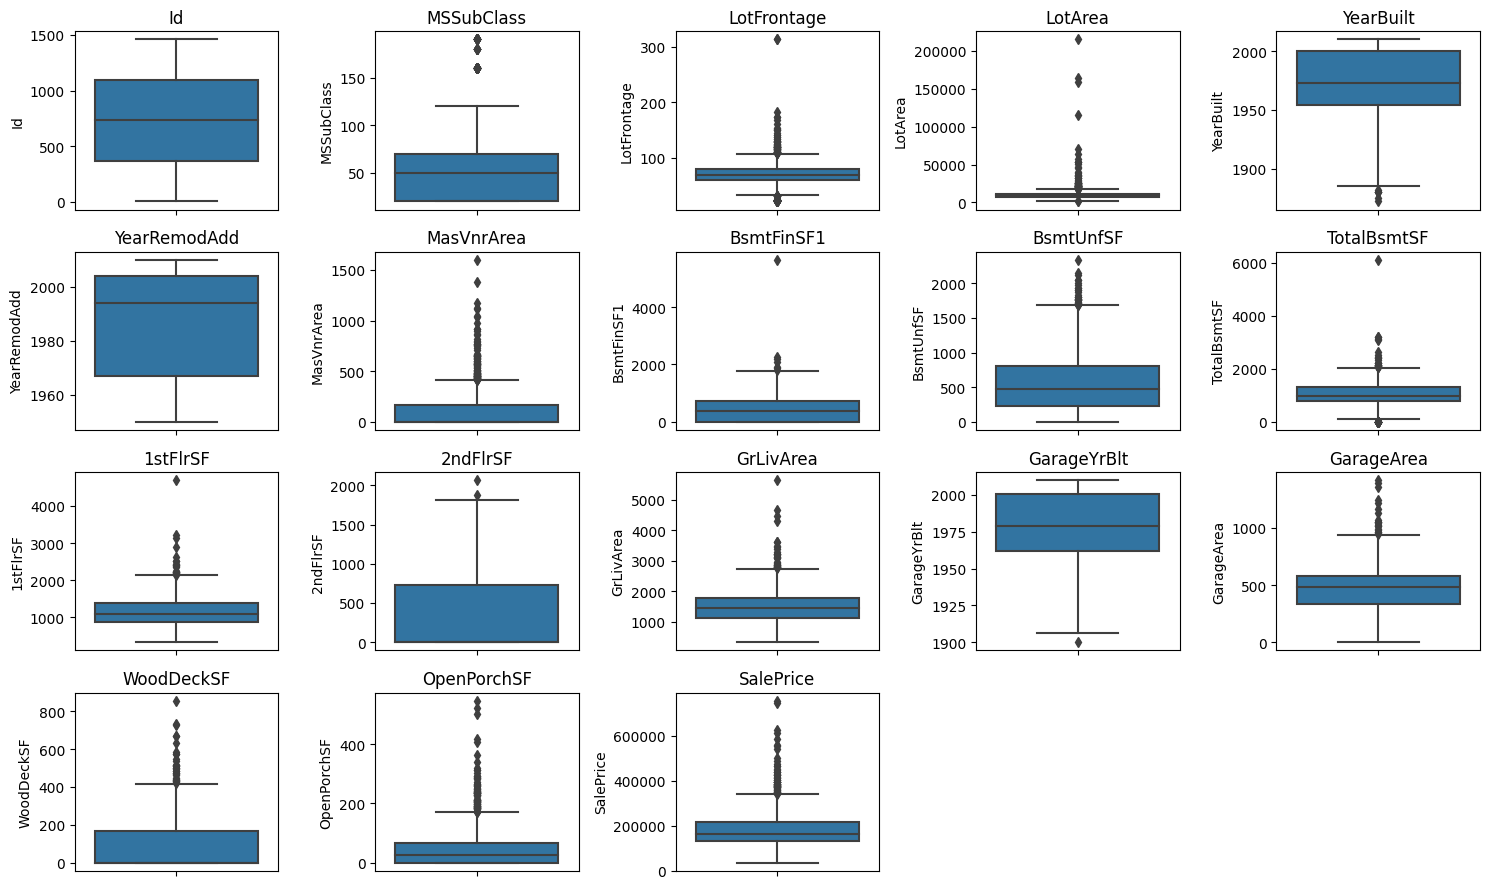

In [25]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 9))

# Vẽ boxplot cho từng cột trong columns_with_many_uniques
for i, col in enumerate(columns_with_many_uniques):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = col, data = df[columns_with_many_uniques].dropna())
    plt.title(col)

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

In [26]:
df = df.drop(df[df['LotFrontage'] > 200].index)
df = df.drop(df[df['LotArea'] > 100000].index)
df = df.drop(df[df['BsmtFinSF1'] > 4000].index)
df = df.drop(df[df['TotalBsmtSF'] > 4000].index)
df = df.drop(df[df['1stFlrSF'] > 4000].index)
df = df.drop(df[df['GrLivArea'] > 5000].index)

In [27]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,Ex,Ex,Y,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,24,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,474,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,Ex,Ex,Y,80,32,7,2006,WD,Normal,NaN


In [191]:
df.to_csv('Stage4.csv', index=False)

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>6. Xử lý cột dạng phân loại ordinal và nominal  </strong></p>
</div>


In [28]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
category_df = df[categorical_columns]
len(categorical_columns)

39

In [29]:
def check_and_categorize_columns(df):
    # Xác định các cột ordinal và nominal
    ordinal_cols = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
        'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
        'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 
        'GarageFinish', 'Electrical', 'Utilities', 
    ]

    nominal_cols = [col for col in categorical_columns if col not in ordinal_cols]

    # In ra kết quả
    print("\nOrdinal columns:", ordinal_cols)
    print("\nNominal columns:", nominal_cols)

    return ordinal_cols, nominal_cols

# Gọi hàm
ordinal_cols, nominal_cols = check_and_categorize_columns(df)


Ordinal columns: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'Functional', 'LandSlope', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Electrical', 'Utilities']

Nominal columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition']


In [30]:
# Cột ordinal (đã loại bỏ PoolQC vì đã xóa trước đó)
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 
                'Functional', 'LandSlope', 'PavedDrive', 'BsmtFinType1', 'BsmtFinType2','GarageFinish', 'Electrical', 'Utilities']

# Cột nominal
nominal_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
                 'GarageType', 'SaleType', 'SaleCondition']
# Xác định thứ tự cho các cột ordinal
ordinal_mapping = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Reg': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Reg': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'Electrical': { 'SBrkr': 4,'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0},
    'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0},
}

# Xử lý cột ordinal
for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping).fillna(0).astype(int)


# Đảm bảo rằng giá trị NA được gán là 0
#df[ordinal_mapping.keys()] = df[ordinal_mapping.keys()].replace({le.transform(['NA'])[0]: 0})

    



In [31]:
# Kiểm tra kết quả
df[ordinal_cols]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,Functional,LandSlope,PavedDrive,BsmtFinType1,BsmtFinType2,GarageFinish,Electrical,Utilities
0,4,3,4,3,5,4,5,3,3,1,7,3,2,6,1,2,4,3
1,3,3,4,3,5,3,3,3,3,4,7,3,2,5,1,2,4,3
2,4,3,4,3,5,4,3,3,3,2,7,3,2,6,1,2,4,3
3,3,3,3,4,4,4,4,3,3,1,7,3,2,5,1,1,4,3
4,4,3,4,3,5,4,3,3,3,3,7,3,2,6,1,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3,3,3,3,4,3,5,5,5,1,7,3,2,1,1,3,4,3
2915,3,3,3,3,3,3,5,3,3,1,7,3,2,0,1,1,4,3
2916,3,3,3,3,5,3,3,3,3,1,7,3,2,5,1,1,4,3
2917,3,3,4,3,3,3,5,5,5,3,7,3,2,6,1,3,4,3


In [32]:
# Xử lý cột nominal
df = pd.get_dummies(df, columns=nominal_cols)

In [33]:
df

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,3,7,5,2003,2003,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,3,3,6,8,1976,1976,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,3,3,7,5,2001,2002,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,3,3,7,5,1915,1970,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,3,3,8,5,2000,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,3,3,4,7,1970,1970,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,3,3,4,5,1970,1970,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,3,3,5,7,1960,1996,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,3,3,5,5,1992,1992,...,False,False,False,True,False,False,False,False,True,False


In [34]:
df.to_csv('preprocessing.csv', index=False)

In [35]:
# Tách lại thành train và test dựa vào ID
train_ids = df1['Id']
train_df = df[df['Id'].isin(train_ids)]
test_df = df[~df['Id'].isin(train_ids)]

# Lưu các file train và test
train_df.to_csv('train_preprocessed.csv', index=False)
test_df.to_csv('test_preprocessed.csv', index=False)

# Kiểm tra kết quả
print("Train and test files have been saved.")

Train and test files have been saved.
